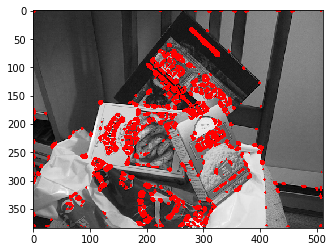

In [29]:
"""
CLAB Task-1: Harris Corner Detector
Your name (Your uniID):
"""

import numpy as np
from numpy import unravel_index
import cv2
from PIL import Image
def conv2(img, conv_filter):
    # flip the filter
    f_siz_1, f_size_2 = conv_filter.shape
    conv_filter = conv_filter[range(f_siz_1 - 1, -1, -1), :][:, range(f_siz_1 - 1, -1, -1)]
    pad = (conv_filter.shape[0] - 1) // 2
    result = np.zeros((img.shape))
    img = np.pad(img, ((pad, pad), (pad, pad)), 'constant', constant_values=(0, 0))
    filter_size = conv_filter.shape[0]
    for r in np.arange(img.shape[0] - filter_size + 1):
        for c in np.arange(img.shape[1] - filter_size + 1):
            curr_region = img[r:r + filter_size, c:c + filter_size]
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result)  # Summing the result of multiplication.
            result[r, c] = conv_sum  # Saving the summation in the convolution layer feature map.

    return result


def fspecial(shape=(3, 3), sigma=0.5):
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m + 1, -n:n + 1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h


# Parameters, add more if needed
sigma = 2
thresh = 0.01

# Derivative masks
dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
dy = dx.transpose()
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from PIL import Image
bw = rgb2gray(plt.imread('Harris_2.jpg'))
bw = np.array(bw * 255, dtype=int)
# computer x and y derivatives of image
Ix = conv2(bw, dx)
Iy = conv2(bw, dy)

g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma)
Iy2 = conv2(np.power(Iy, 2), g)
Ix2 = conv2(np.power(Ix, 2), g)
Ixy = conv2(Ix * Iy, g)

######################################################################
# Task: Compute the Harris Cornerness

img = np.array(Image.open('Harris_2.jpg')) # used for computing corners
im = np.array(cv2.imread('Harris_2.jpg')) # used for final output representation
window_s = 3 # Window size
h_r = np.zeros((img.shape[0]-window_s+1,img.shape[1]-window_s+1)) # used to store Harris response
# loop through all the pixels in the image
for i in range(h_r.shape[0]):
    for j in range(h_r.shape[1]):
        x_sum = np.sum(Ix2[i:i+window_s, j:j+window_s])
        y_sum = np.sum(Iy2[i:i+window_s, j:j+window_s])
        xy_sum = np.sum(Ixy[i:i+window_s, j:j+window_s])
        det = x_sum*y_sum -xy_sum**2
        trace =x_sum + y_sum
        r = det - thresh*trace**2
        h_r[i,j]=r
        
######################################################################


######################################################################
# Task: Perform non-maximum suppression and
#       thresholding, return the N corner points
#       as an Nx2 matrix of x and y coordinates 
def nms (r):
    corner = []
    mean = r[r>0].mean()
    for i in range(r.shape[0]-2):
        for j in range(r.shape[1]-2):
            window = r[i:i+3,j:j+3]
            max_value = np.amax(window)
            index =unravel_index(window.argmax(),window.shape)
            if max_value > mean:
                x = i+index[0]
                y = j+index[1]
                corner.append([x,y])
    return np.array(corner)           
corner=nms(h_r)
for i in corner:
    im[i[0],i[1]] = [255,0,0]
plt.imshow(im)
Image.fromarray(im).save('Harris_2_dots.jpg')
######################################################################

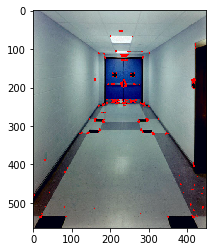

In [30]:
import cv2 
import numpy as np 

image = cv2.imread('Harris_4.jpg') 

operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

operatedImage = np.float32(operatedImage) 

dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 

dest = cv2.dilate(dest, None) 

image[dest > 0.001 * dest.max()]=[255, 0, 0] 

plt.imshow(image) 
Image.fromarray(image).save('Harris_4_dots_inbuilt.jpg')

In [ ]:
corner